## Writing a Blogpost on the Analysis of Stackoverflow Survey of 2017

## Table of Contents
<ul>
<li><a href="#intro">Introduction, Motivation & CRISP-DM Process</a></li>
<li><a href="#importing">Importing Libraries & Data</a></li>
<li><a href="#flook">Understanding & Preparing the Data</a></li>
<li><a href="#Wrangling">Answering stated questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction & the CRISP-DM Process

Given the dataset of Stackoverflow in the year 2017, I decided, to basically try to answer a simple question: how does the average User/Persona look, that is using Stackoverflow in 2017. 

As cited by Wikipedia, CRISP-DM can be summarized as follows:

"Based on current research CRISP-DM is the most widely used form of data-mining model because of its various advantages which solved the existing problems in the data mining industries. Some of the drawbacks of this model is that it does not perform project management activities. The fact behind the success of CRISP-DM is that it is industry, tool, and application neutral."

CRISP-DM consists of the following six phases:

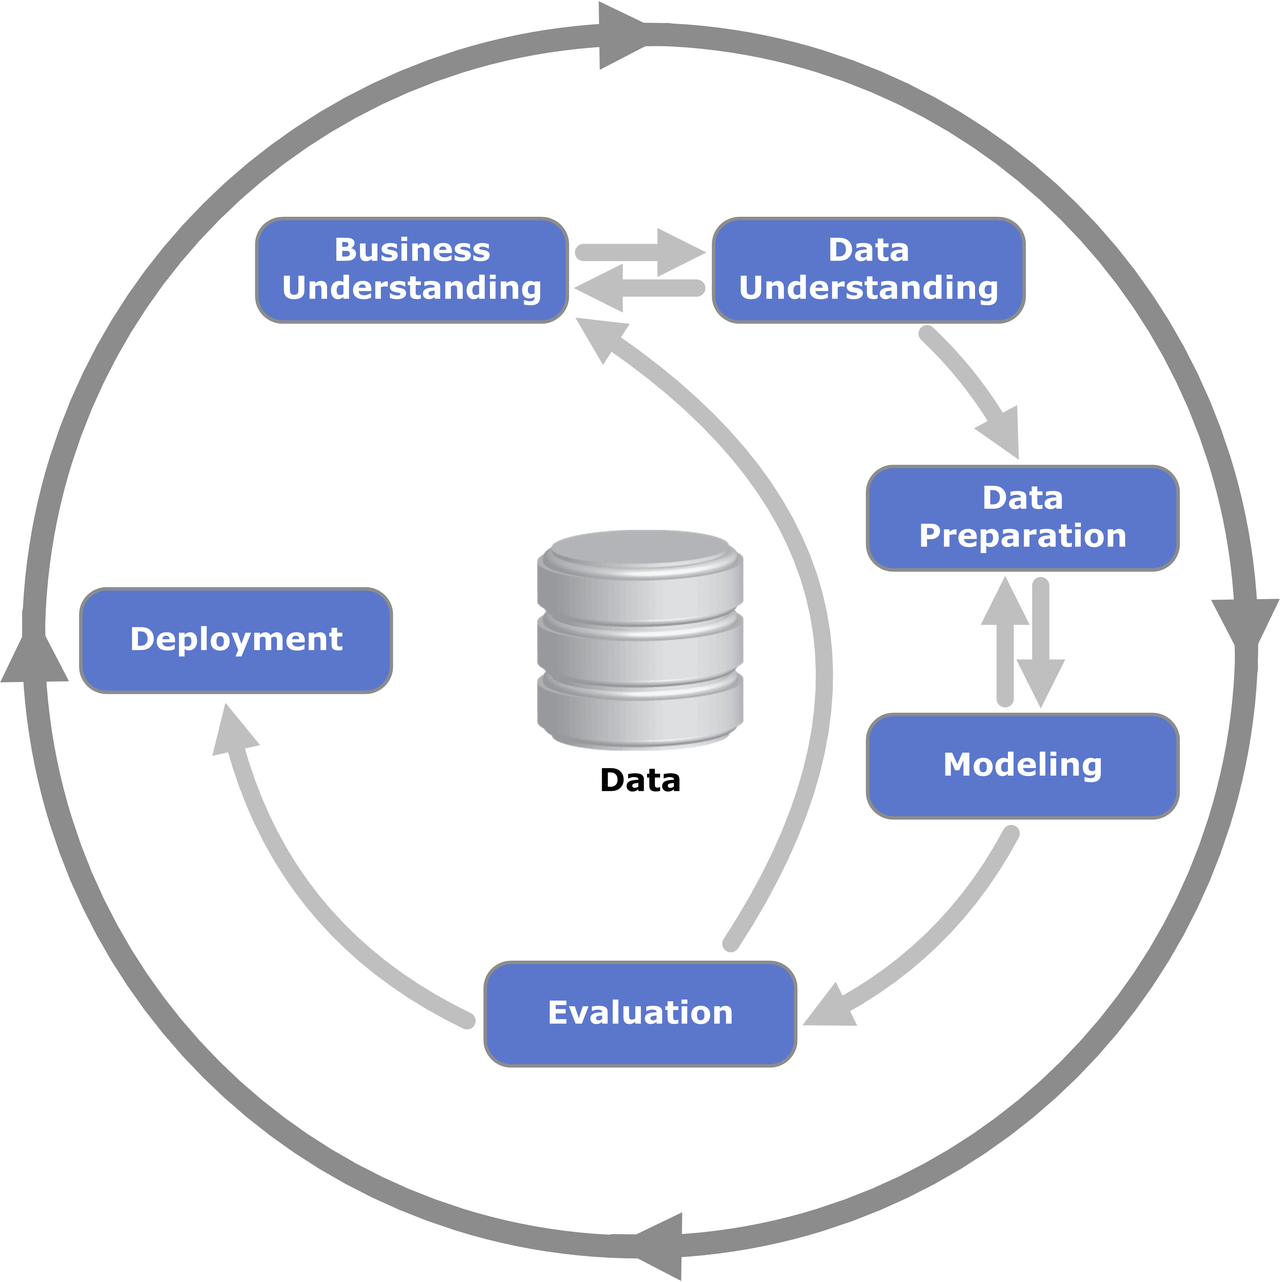

Source: https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

Since, the focus of this notebook resides on data mining & insight discovery, I will focus on answering predefined questions and neglect the machine learning based modelling & deployment phases and replace them, by answering questions with suited visualizations and a overall conclusion. 

The main question I will state for analysing the dataset, is what attributes characterize the typtical Stackoverflow user in 2017. To answer this, I will focus on several columns, that will give insight about the general Persona, that on average is seen most frequently using Stackoverflow in 2017. For this, I will aim questions such as:

- Of what gender is the typical user?
- How much does a typical user earn?
- Where is a typical user from?
- What does a typical think about Stackoverflow?
- How well educated is a typical user?

Furthermore, I will also enhance the persona of the average Stackoverflow user by other data, if I see this suited.

<a id='importing'></a>
## Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2017 = pd.read_csv("Dataset 2017.csv", sep = ",", encoding='latin1')
df_2017_desc = pd.read_csv("Dataset 2017_columns.csv", sep = ",", encoding='latin1')

<a id='flook'></a>
## Understanding & Preparing the Data

In order to get a first understanding, what question and with that what informationes resides within the columns, I also got the description, going into details behind said questions and will first look intop this.

In [3]:
display(df_2017_desc.iloc[1:50,:])
display(df_2017_desc.iloc[51:100,:])
display(df_2017_desc.iloc[101:150,:])
display(df_2017_desc.iloc[151:200,:])

,Column,Question
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."
10,CompanyType,Which of the following best describes the type...


,Column,Question
51,AssessJobExp,When you're assessing potential jobs to apply ...
52,AssessJobDept,When you're assessing potential jobs to apply ...
53,AssessJobTech,When you're assessing potential jobs to apply ...
54,AssessJobProjects,When you're assessing potential jobs to apply ...
55,AssessJobCompensation,When you're assessing potential jobs to apply ...
56,AssessJobOffice,When you're assessing potential jobs to apply ...
57,AssessJobCommute,When you're assessing potential jobs to apply ...
58,AssessJobRemote,When you're assessing potential jobs to apply ...
59,AssessJobLeaders,When you're assessing potential jobs to apply ...
60,AssessJobProfDevel,When you're assessing potential jobs to apply ...


,Column,Question
101,ShipIt,It's better to ship now and optimize later
102,OtherPeoplesCode,Maintaining other people's code is a form of t...
103,ProjectManagement,Most project management techniques are useless
104,EnjoyDebugging,I enjoy debugging code
105,InTheZone,I often get âinto the zoneâ when I'm coding
106,DifficultCommunication,I have difficulty communicating my ideas to my...
107,CollaborateRemote,It's harder to collaborate with remote peers t...
108,MetricAssess,Congratulations! The bosses at your new employ...
109,EquipmentSatisfiedMonitors,"Thinking about your main coding workstation, h..."
110,EquipmentSatisfiedCPU,"Thinking about your main coding workstation, h..."


,Column,Question
151,InterestedAnswers,I'm interested in learning how other developer...
152,Salary,"What is your current annual base salary, befor..."
153,ExpectedSalary,You said before that you are currently learnin...


Next, I will take a look at the data at hand and have a look at the first rows.

In [4]:
display(df_2017.iloc[:,1:50].head())
display(df_2017.iloc[:,51:100].head())
display(df_2017.iloc[:,101:150].head())
display(df_2017.iloc[:,151:200].head())

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Somewhat agree,Disagree,Somewhat agree,Agree,Disagree,Agree,NaN,NaN,NaN,NaN
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Agree,Disagree,Strongly agree,Strongly agree,Somewhat agree,Agree,I am actively looking for a job,5.0,Between 2 and 4 years ago,Somewhat important
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,...,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl
0,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,...,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,.NET Core,.NET Core,MySQL; SQLite,MySQL; SQLite,Amazon Web Services (AWS),Linux Desktop; Raspberry Pi; Amazon Web Servic...,Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...,"Put on some ambient sounds (e.g. whale songs, ...",NaN,Git
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,MySQL,NaN,NaN,NaN,Sublime Text; Vim; IntelliJ,Turn on some music,Agile; Lean; Scrum; Extreme; Pair; Kanban,Mercurial
3,Somewhat important,Important,Important,Very important,Important,Very important,Important,Somewhat important,Not very important,Very important,...,React,Hadoop; Node.js; React,MongoDB; Redis; SQL Server; MySQL; SQLite,MongoDB; Redis; SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Windows Desktop; Linux Desktop; Mac OS; Amazon...,Notepad++; Sublime Text; TextMate; Vim; IPytho...,Turn on some music,Agile,Git
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,...,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,...,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree
1,Agree,Disagree,Strongly disagree,Agree,Somewhat agree,Disagree,Strongly disagree,Customer satisfaction; On time/in budget; Peer...,Not very satisfied,Satisfied,...,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree
2,Agree,Disagree,Disagree,Agree,Agree,Disagree,Somewhat agree,Customer satisfaction; Benchmarked product per...,Very satisfied,Somewhat satisfied,...,Strongly agree,Agree,Agree,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree
3,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Disagree,Somewhat agree,NaN,NaN,NaN,...,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied,Satisfied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,InterestedAnswers,Salary,ExpectedSalary
0,Strongly agree,NaN,NaN
1,Strongly agree,NaN,37500.0
2,Agree,113750.0,NaN
3,Strongly agree,NaN,NaN
4,NaN,NaN,NaN


Next I will assess the NaN/Missings within the data

In [5]:
#look at NaN counts and datatypes of columns for df_2017
display(df_2017.iloc[:,0:100].info())
display(df_2017.iloc[:,101:154].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 100 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Respondent                        51392 non-null  int64  
 1   Professional                      51392 non-null  object 
 2   ProgramHobby                      51392 non-null  object 
 3   Country                           51392 non-null  object 
 4   University                        51392 non-null  object 
 5   EmploymentStatus                  51392 non-null  object 
 6   FormalEducation                   51392 non-null  object 
 7   MajorUndergrad                    42841 non-null  object 
 8   HomeRemote                        44008 non-null  object 
 9   CompanySize                       38922 non-null  object 
 10  CompanyType                       38823 non-null  object 
 11  YearsProgram                      51145 non-null  object 
 12  Yea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ShipIt                       29641 non-null  object 
 1   OtherPeoplesCode             29619 non-null  object 
 2   ProjectManagement            29399 non-null  object 
 3   EnjoyDebugging               29765 non-null  object 
 4   InTheZone                    29350 non-null  object 
 5   DifficultCommunication       29640 non-null  object 
 6   CollaborateRemote            29457 non-null  object 
 7   MetricAssess                 25472 non-null  object 
 8   EquipmentSatisfiedMonitors   29725 non-null  object 
 9   EquipmentSatisfiedCPU        29727 non-null  object 
 10  EquipmentSatisfiedRAM        29736 non-null  object 
 11  EquipmentSatisfiedStorage    29671 non-null  object 
 12  EquipmentSatisfiedRW         29689 non-null  object 
 13  InfluenceInterne

None

Since we have fairly large quantities of missing values and measurements such as imputing make noth that much sense in poll data, I would like to know what the data without NaNs would look like and if it would make seinse to furter cover this.

In [6]:
#assess size of non-NaN data
len(df_2017.dropna())

0

Since the dataset roughly consists of about 50.000 observations and missing values seem to make up very large portions of the dataset and the focus resides on EDA and not fitting a model, I decided to go for leaving the NaN values as they are and continue without dropping them. 

Hence, I will no try to check, wether we have outliers in form of numerical datapoints within the data programmatically and visually.

In [7]:
#programmatically assess dataset for outliers
df_2017_numerics = df_2017.select_dtypes(include=["float64", "int64"])
df_2017_numerics.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


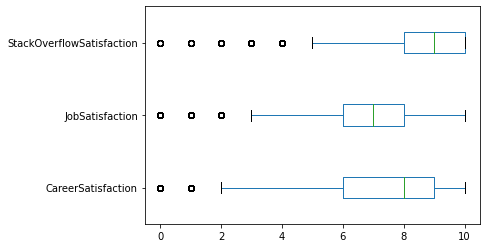

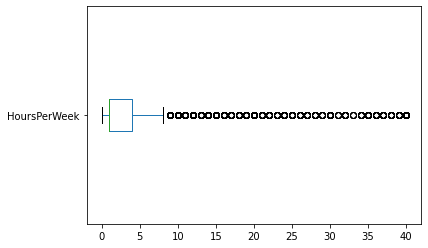

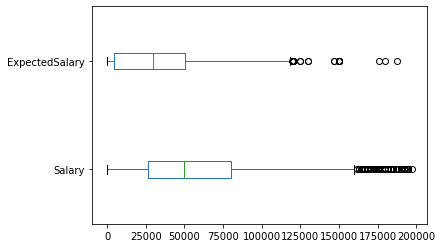

In [8]:
#visually search for potential outliers
df_2017[['CareerSatisfaction','JobSatisfaction','StackOverflowSatisfaction']].plot(kind = 'box', vert=False)
plt.show()

df_2017[['HoursPerWeek']].plot(kind = 'box', vert=False)
plt.show()

df_2017[['Salary', 'ExpectedSalary']].plot(kind = 'box', vert=False)
plt.show()

Now, that I have assessed the dataset, I will go over to start answering the questions with columns I find suited to give a meaningful insight into the situation behind the questions.

<a id='Wrangling'></a>
## Answering stated questions

### Of what gender is the typical user?

After looking at hte columns description, the Gender columns seems very suited to give an insight into this question, hence I will plot the situation via a percentual distribution.

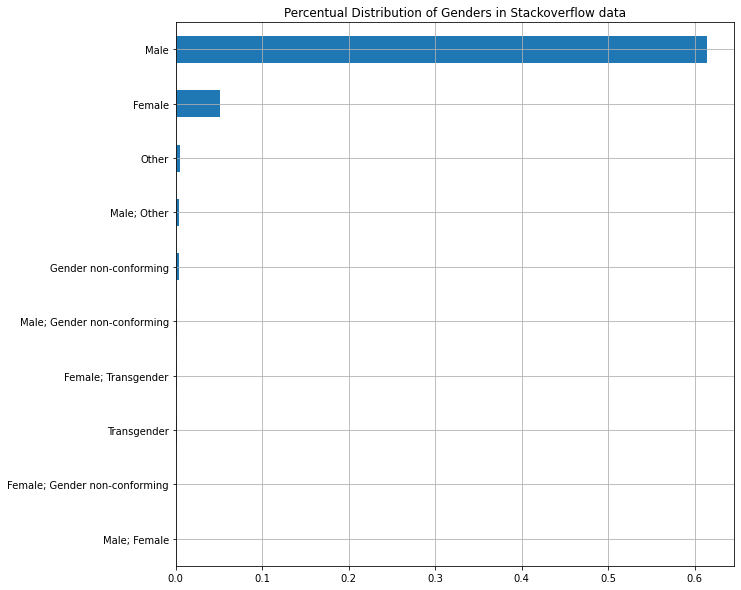

In [9]:
plt.figure(figsize=(10,10))
(df_2017.Gender.value_counts().sort_values()/len(df_2017)).tail(10).plot(kind = 'barh')
plt.title('Percentual Distribution of Genders in Stackoverflow data');
plt.grid(True)

The generell overview shows, that approximately 63 % have stated to be male and around 5 % seem to be female. Additionally, we can see various subgroups stating different things, containing non-gebnder-conformity and other phrases that can be broken down to male or female.

### How much does a typical user earn and what does he expect to earn?

The columns Salary and expected salary seem to give a good basis for answering this question.

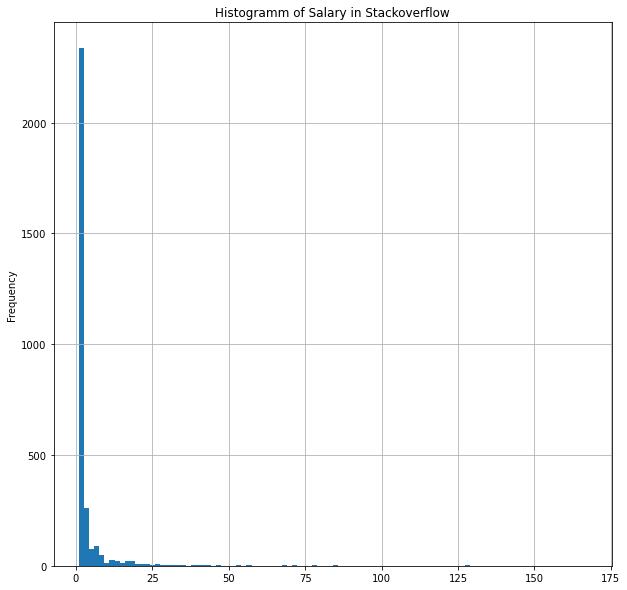

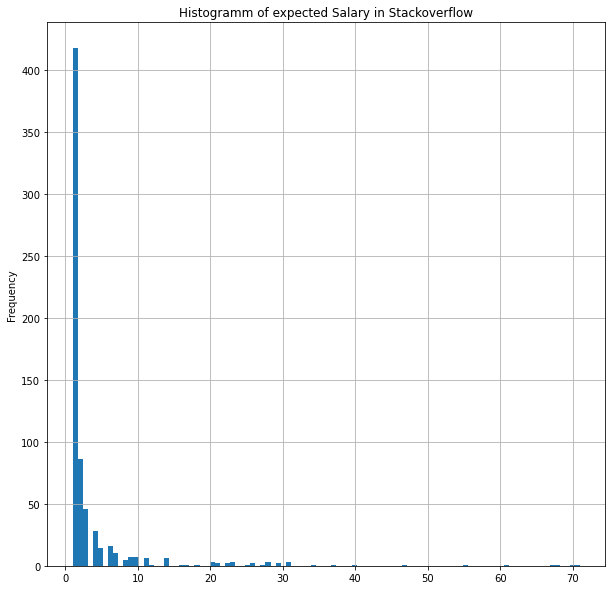

<Figure size 720x720 with 0 Axes>

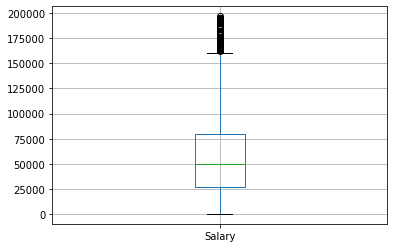

actual salaries mean :  56298.480640629256
expected salaries mean :  33142.22046770983


In [10]:
plt.figure(figsize=(10,10))
df_2017.Salary.value_counts().sort_values().plot(kind = 'hist', bins = 100)
plt.title('Histogramm of Salary in Stackoverflow');
plt.grid(True)

plt.figure(figsize=(10,10))
df_2017.ExpectedSalary.value_counts().sort_values().plot(kind = 'hist', bins = 100)
plt.title('Histogramm of expected Salary in Stackoverflow');
plt.grid(True)

plt.figure(figsize=(10,10))
df_2017[['Salary']].plot(kind = 'box')
plt.grid(True)
plt.show()

print("actual salaries mean : ", df_2017.Salary.mean())
print("expected salaries mean : ", df_2017.ExpectedSalary.mean())

Looking at the results at hand, it seems unlikely, that this question often was answered correctly, however since I currently have no means of challenging this information without changing the data, I will handle the information we see in this data likte it is, but will also remark, that this is an unlikely result imaging the reality of Stackoverflow users.

Hence, a typical User earns around 56.000$ per year before taxes and seems to expect around 33.000$ per year.

### Where is a typical user from?

To answer this question, we can use the Race and Country columns. Race coulm is giving an insight into heritage/ethnicy, wehile country is giving an insight into the current reside of the poll-taker.

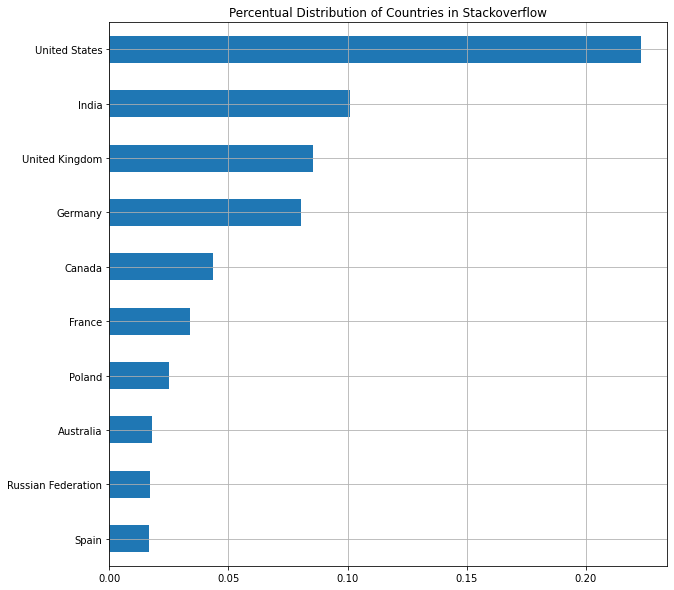

In [11]:
plt.figure(figsize=(10,10))
(df_2017.Country.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Distribution of Countries in Stackoverflow');
plt.grid(True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


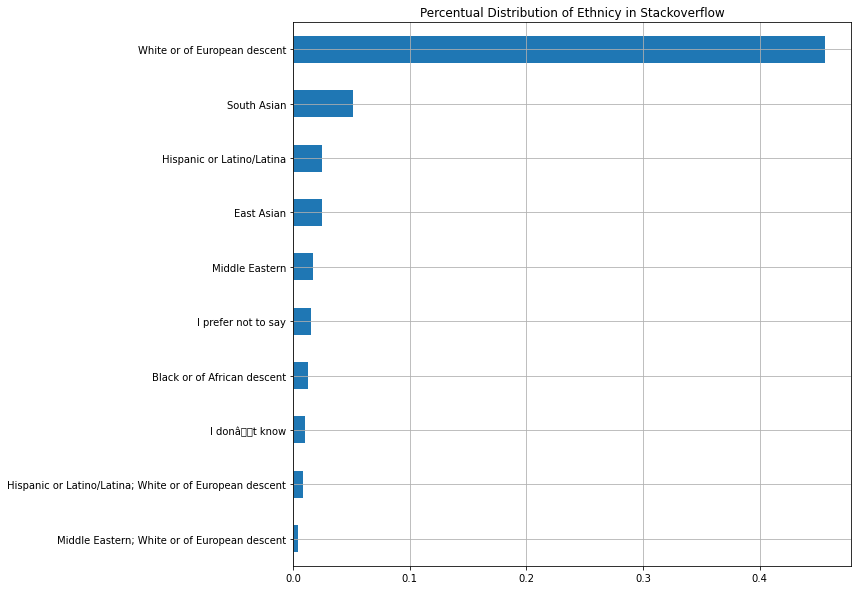

In [12]:
plt.figure(figsize=(10,10))
(df_2017.Race.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Distribution of Ethnicy in Stackoverflow');
plt.grid(True)

In the first plot, we can see, that the Unitet States seem to make the biggest part of Stackoverflow users floowed by India and the UK.
Regarding the Ethnicy of User approximately 50 % and by that the largest part by far seems to be of caucasian origin, while the second largest party seems to be Overall Asian, which aligns with India as second largest Usergroup country-wise.

### What does a typical think about Stackoverflow?

Since there is no direct question stating directly what poll-takers think about Stackoverflow, we have to deduct this from other questions statedf. For this After having a look at the questions, I chose 3 question from which I can conclude from to the general mood/opinion of Users regarding Stackoverflow.

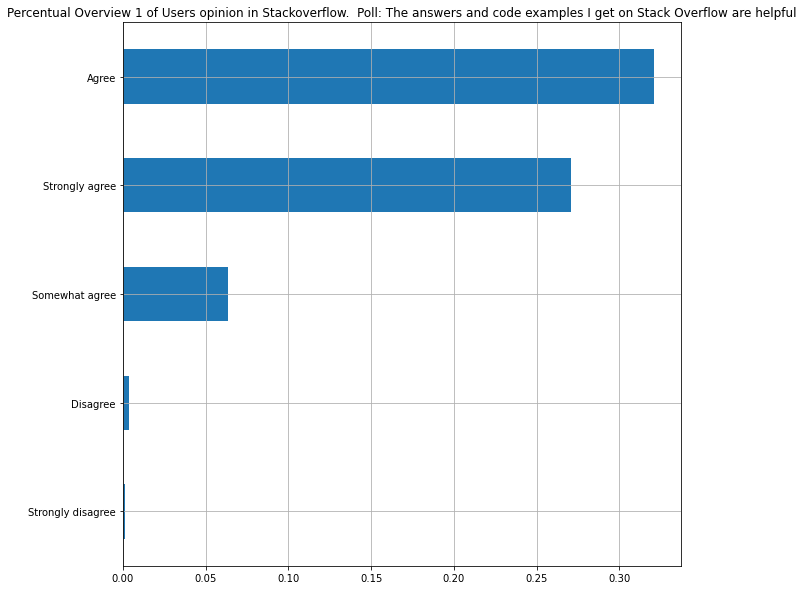

In [19]:
plt.figure(figsize=(10,10))
(df_2017.StackOverflowHelpful.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Overview 1 of Users opinion in Stackoverflow.  Poll: The answers and code examples I get on Stack Overflow are helpful');
plt.grid(True)

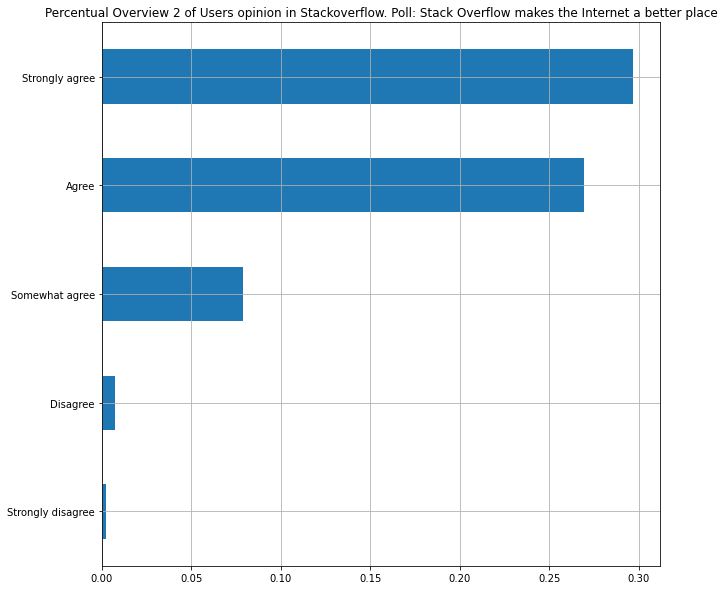

In [20]:
plt.figure(figsize=(10,10))
(df_2017.StackOverflowBetter.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Overview 2 of Users opinion in Stackoverflow. Poll: Stack Overflow makes the Internet a better place');
plt.grid(True)

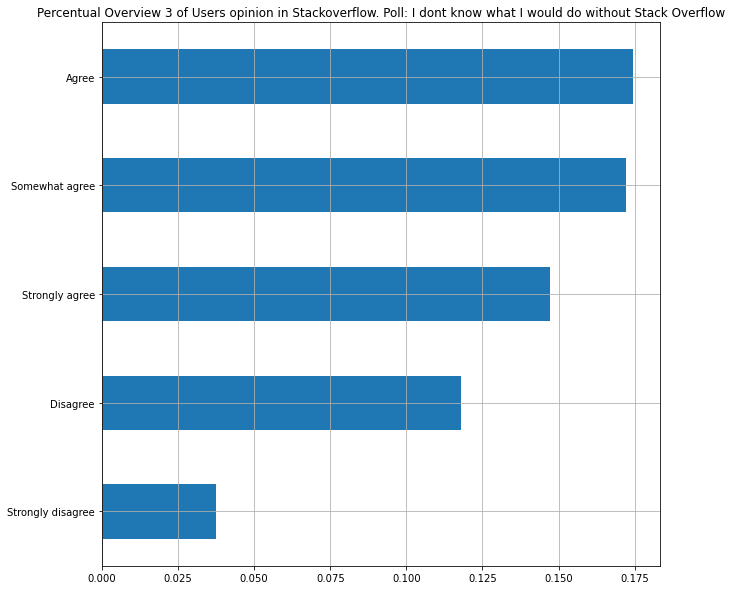

In [21]:
plt.figure(figsize=(10,10))
(df_2017.StackOverflowWhatDo.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Overview 3 of Users opinion in Stackoverflow. Poll: I dont know what I would do without Stack Overflow');
plt.grid(True)

Combining the information, we can assume, that the typical user thinks in a positive way about Stackoverflow.

## How well educated is a typical user?

In the poll, there is a direct quesrtion that is asking exactly this question, hence it will be used for answering this.

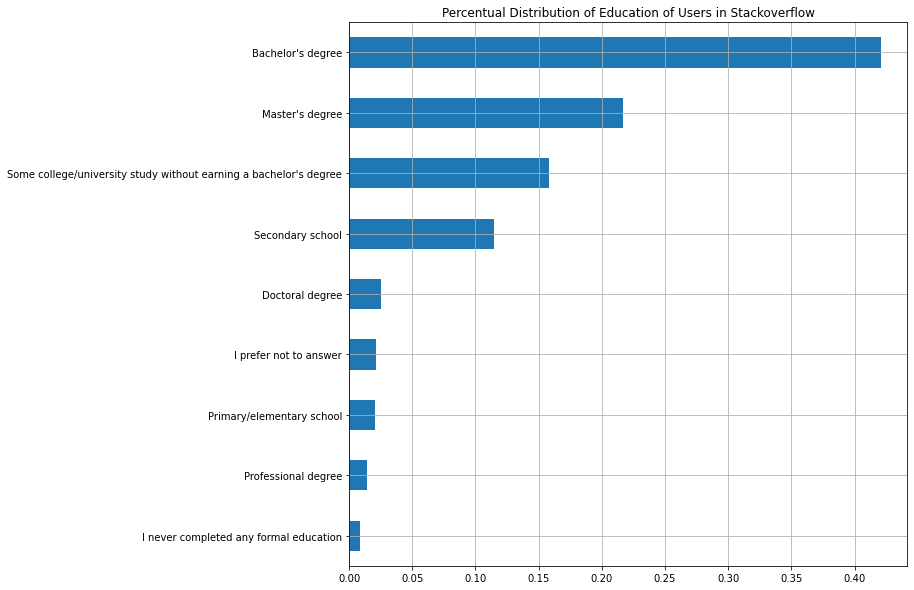

In [24]:
plt.figure(figsize=(10,10))
(df_2017.FormalEducation.value_counts().sort_values().tail(10)/len(df_2017)).plot(kind = 'barh')
plt.title('Percentual Distribution of Education of Users in Stackoverflow');
plt.grid(True)

Looking at the result, it becomes clear, that most of the users seem to have some sort of academical degree with bachelors and masters degree taking the most frequent postiions among this.

### Getting additional Information about the dataset

In order to gather more relevant information about the data, I decided to use the describe function to validate the existing information aswell, as potontially gather new information.

In [25]:
#look at high level description of 2017
df_2017_objects = df_2017.select_dtypes(include="object")
display(df_2017_objects.describe().iloc[:,0:19])
display(df_2017_objects.describe().iloc[:,20:39])
display(df_2017_objects.describe().iloc[:,40:59])
display(df_2017_objects.describe().iloc[:,60:79])
display(df_2017_objects.describe().iloc[:,80:99])
display(df_2017_objects.describe().iloc[:,100:119])
display(df_2017_objects.describe().iloc[:,120:139])

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,ExCoderReturn,ExCoderNotForMe
count,51392,51392,51392,51392,51392,51392,42841,44008,38922,38823,51145,40890,974,36125,10696,1553,4890,923,921
unique,5,4,201,4,7,9,16,7,10,11,21,21,21,1823,3,11,134,5,5
top,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,"Privately-held limited company, not in startup...",20 or more years,1 to 2 years,20 or more years,Web developer,Full stack Web developer,Android,Other,Agree,Strongly disagree
freq,36131,24801,11455,37543,36148,21609,21409,15454,8587,16709,8817,5289,154,10683,6816,641,1296,250,348


,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare
count,917,928,935,922,930,51008,31293,31234,31304,31184,31240,30903,31021,31057,30984,31047,31014,30886,30965
unique,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5
top,Somewhat agree,Disagree,Somewhat agree,Disagree,Agree,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Disagree,Agree,Agree,Strongly agree,Disagree,Somewhat agree,Somewhat agree,Agree,Agree,Disagree
freq,258,329,289,312,297,33484,18040,17433,15318,11870,13035,12011,12471,9609,9894,8071,14911,12578,13907


,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct
count,30971,30810,30935,33380,32710,22130,22147,22136,22123,22189,22183,22146,22004,21973,22020,21986,21998,21978,21997
unique,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",Less than a year ago,Important,Important,Important,Important,Important,Important,Important,Important,Important,Somewhat important,Somewhat important,Very important,Somewhat important,Important
freq,14592,9803,9192,20729,10359,7391,8373,9973,8642,9106,9807,9788,9904,8316,6157,7380,9322,6801,7791


,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant
count,30235,42046,24719,22461,23737,28642,28694,28639,28596,28617,28553,28553,28663,28618,28545,21408,13387,38851,23355
unique,3530,2,479,8,8,5,5,5,5,5,5,5,5,5,5,17,5,3,5
top,None of these,Yes,LinkedIn,I was just giving it a regular update,"A friend, family member, or former colleague t...",Important,Important,Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Not very important,Important,U.S. dollars ($),Somewhat underpaid,Tabs,Somewhat important
freq,653,22618,14139,6737,6355,11852,10782,13136,10408,9899,11723,10734,11034,10802,12753,7073,6017,16682,6289


,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode
count,26735,2602,23568,36696,36625,33771,20229,23331,29452,25109,29114,27884,35830,36457,25771,30730,29561,29641,29619
unique,1149,9,735,24,8438,11239,285,407,237,248,2006,2198,4798,6,788,10,6,5,5
top,Official documentation; Trade book; Stack Over...,I already had a job as a developer when I star...,Take online courses; Buy books and work throug...,9:00 AM,C#; JavaScript; SQL,JavaScript,.NET Core,.NET Core,MySQL,MySQL,Windows Desktop,Amazon Web Services (AWS),Notepad++; Visual Studio,Turn on some music,Agile; Scrum,Git,Multiple times a day,Somewhat agree,Somewhat agree
freq,1001,1193,711,9401,1276,642,3201,2038,4254,2009,3252,1720,1624,21729,2422,21266,15562,9784,11599


,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud
count,29765,29350,29640,29457,25472,29725,29727,29736,29671,29689,29691,21658,21659,21584,21601,21593,21613,21616,21595
unique,5,5,5,5,2420,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,Somewhat agree,Agree,Disagree,Somewhat agree,Customer satisfaction; On time/in budget,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Some influence,No influence at all,No influence at all,No influence at all,Some influence,No influence at all,No influence at all,No influence at all
freq,10115,12454,14785,8983,817,11416,12063,11648,12007,12040,10973,5739,10734,10338,8265,5899,9893,8368,9424


,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo
count,21586,21578,36932,35203,34290,33909,33468,33435,33415,33618,33556,33407,30817,31737,30129,32410,33946,33650,33369
unique,5,5,5,47,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,No influence at all,No influence at all,"I have a login for Stack Overflow, but haven't...",Desktop,At least once each week,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Somewhat agree,Disagree,Disagree,Somewhat agree,Agree,Strongly agree,Agree
freq,12743,6891,19696,16516,13090,10400,19640,26263,24202,20914,19394,28257,13660,17701,17733,10829,16502,15262,8972


In [26]:
df_2017_numerics.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


<a id='conclusions'></a>
## Conclusion

After taking a look at the data to answer my stated questions, we can infer the following things. 

Summarized, the typcial Stackoverflow user....
 - is of european ethnicy/ is white
 - has a bachelors or master degree
 - earns around 56.000 dollars an per year, but expects to earn around 33.000 dollars
 - is male
 - lives in the United States of America
 - thinks positively about Stackoverflow
 
Again, as stated above, the validity of these results in same cases stays in my eyes biased, especially regarding the salary earned and expected. It could very well be, that is due to a non-willingness of poll-takers to answer the question correctly or some sort of transformation error of any sort manipulation the actual answers. 

Furthermore looking at addional information to enhance the Persona, the following things can be observed:


- University: Most poll-takers are not anymore immatriculated in an university degree
- Employed_Status:  Most poll-takers are working full-time
- Background: Most poll-takers do have a background in Computer science or software engineering via University
- CompanySize: Most poll-takers work in a company sized 20 to 99 employees
- HomeRemote: Most poll-takers work A few days each month remotely or from home	
- Satisfaction: Most poll-takers are satisfied with their job and career 
